In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Read CSV created from APIs
# Census data combined with crime data
datafile = "Data/censuscrimedata.csv"
censusCrimeData = pd.read_csv(datafile)
del censusCrimeData['State']
del censusCrimeData['Unnamed: 0']
censusCrimeData.head()

,State Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Violent Crime Count,Crime Rate
0,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,9504.0,0.194904
1,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,6343.0,0.860572
2,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,31198.0,0.442506
3,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,17096.0,0.569986
4,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,173298.0,0.441147


In [3]:
censusCrimeData['Population'].max()

39283497.0

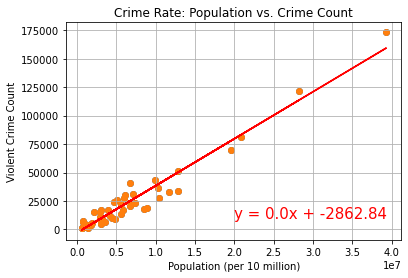

In [4]:
# Show Crime Rate as Crime Count vs. Population
plt.scatter(censusCrimeData['Population'],censusCrimeData['Violent Crime Count'])
# Add the linear regression equation and line to plot
plt.title("Crime Rate: Population vs. Crime Count")
x_values = censusCrimeData['Population']
y_values = censusCrimeData['Violent Crime Count']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20000000,10000),fontsize=15,color="red")
plt.xlabel('Population (per 10 million)')
plt.ylabel('Violent Crime Count')
plt.grid()
plt.savefig('Output/crimerate-PopVsCrimeCount.png', bbox_inches="tight")

# x = ['0', '5', '10', '15', '20', '25', '30', '35', '40']
# default_x_ticks = range(len(x))
# plt.xticks(default_x_ticks, x)
# plt.xticks(horizontalalignment="center")
# plt.subplots_adjust(left=0.25)
plt.show()

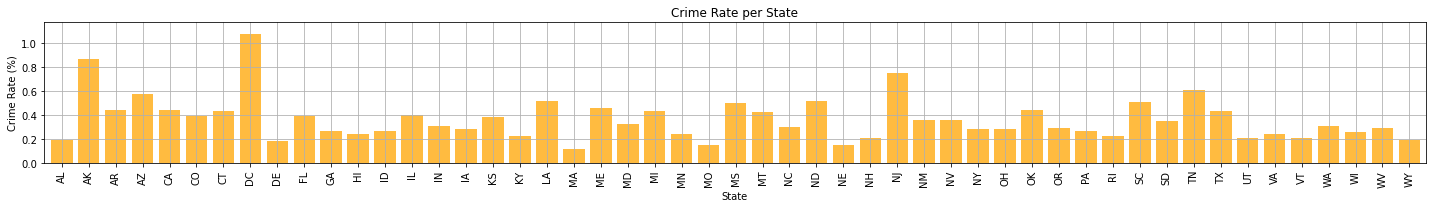

In [5]:
# Bar chart illustrating crime rate per state
stateAbbs = ['AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
            'KY', 'LA', 'MA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 
            'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
# Set x axis and tick locations
x_axis = np.arange(len(stateAbbs))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, censusCrimeData["Crime Rate"], color='orange', alpha=0.75, align="edge")
plt.xticks(tick_locations, stateAbbs, rotation="vertical")
plt.grid()

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(censusCrimeData["Crime Rate"])+.1)

# Set a Title and labels
plt.title("Crime Rate per State")
plt.xlabel("State")
plt.ylabel("Crime Rate (%)")

# Save our graph and show the grap
plt.tight_layout()
# plt.savefig("Output/CrimeRatePerState.png")
plt.show()

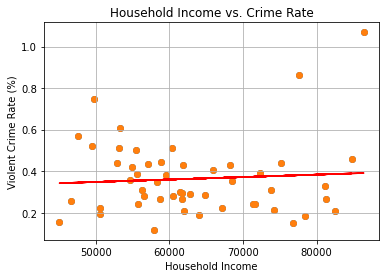

In [6]:
plt.scatter(censusCrimeData['Household Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Household Income']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(45000,6000),fontsize=15,color="red")
plt.title("Household Income vs. Crime Rate")
plt.xlabel('Household Income')
plt.ylabel('Violent Crime Rate (%)')
plt.grid()
plt.savefig('Output/crimeVsHouseIncome.png', bbox_inches="tight")
plt.show()

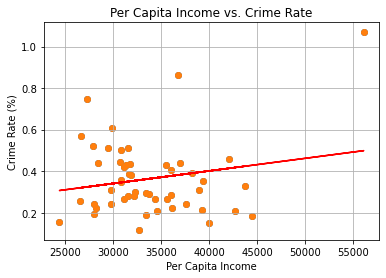

In [7]:
plt.scatter(censusCrimeData['Per Capita Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Per Capita Income']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(450,60),fontsize=15,color="red")
plt.title("Per Capita Income vs. Crime Rate")
plt.xlabel('Per Capita Income')
plt.ylabel('Crime Rate (%)')
plt.grid()
plt.savefig('Output/crimeVsPerCapitaIncome.png', bbox_inches="tight")
plt.show()

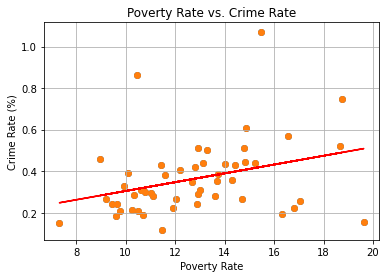

The r-value is: 0.3247255888412339


In [8]:
# Poverty Rate Versus Crime Rate
plt.scatter(censusCrimeData['Poverty Rate'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Poverty Rate']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(450,60),fontsize=15,color="red")
plt.title("Poverty Rate vs. Crime Rate")
plt.xlabel('Poverty Rate')
plt.ylabel('Crime Rate (%)')
plt.grid()
plt.savefig('Output/crimeVsPoverty.png', bbox_inches="tight")
plt.show()

print(f"The r-value is: {rvalue}")

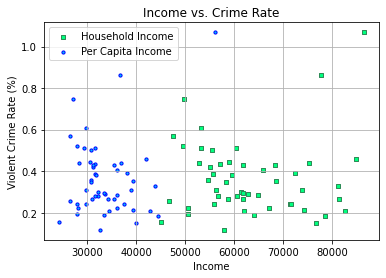

In [9]:
# Plot income on same axis

# plt.scatter(censusCrimeData['Household Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x1 = censusCrimeData['Household Income']
x2 = censusCrimeData['Per Capita Income']
y = censusCrimeData['Crime Rate']

figIncome = plt.figure()
ax1 = figIncome.add_subplot(111)

ax1.scatter(x1, y, s=10, c='springgreen', edgecolor='seagreen', marker="s", label='Household Income')
ax1.scatter(x2,y, s=10, c='deepskyblue', edgecolor='b', marker="o", label='Per Capita Income')

plt.legend(loc='upper left')
plt.title("Income vs. Crime Rate")
plt.xlabel('Income')
plt.ylabel('Violent Crime Rate (%)')
plt.grid()
plt.savefig('Output/crimeVsCombinedIncome.png', bbox_inches="tight")
plt.show()

In [10]:
# Remove outlier (DC) and see if trends change
noDCdf = censusCrimeData.drop([7])

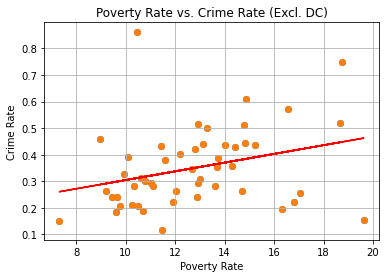

The r-value is: 0.30040947950587876


In [11]:
# Poverty Rate vs. Crime Rate -- ignoring DC

# Poverty Rate Versus Crime Rate
plt.scatter(noDCdf['Poverty Rate'],noDCdf['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = noDCdf['Poverty Rate']
y_values = noDCdf['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(450,60),fontsize=15,color="red")
plt.title("Poverty Rate vs. Crime Rate (Excl. DC)")
plt.xlabel('Poverty Rate')
plt.ylabel('Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsPoverty-noDC.png', bbox_inches="tight")
plt.show()


print(f"The r-value is: {rvalue}")

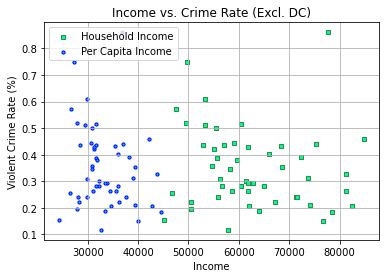

In [12]:
# Plot income on same axis -- Excluding DC

# plt.scatter(censusCrimeData['Household Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x1 = noDCdf['Household Income']
x2 = noDCdf['Per Capita Income']
y = noDCdf['Crime Rate']

figIncome = plt.figure()
ax1 = figIncome.add_subplot(111)

ax1.scatter(x1, y, s=10, c='springgreen', edgecolor='seagreen', marker="s", label='Household Income')
ax1.scatter(x2,y, s=10, c='deepskyblue', edgecolor='b', marker="o", label='Per Capita Income')

plt.legend(loc='upper left')
plt.title("Income vs. Crime Rate (Excl. DC)")
plt.xlabel('Income')
plt.ylabel('Violent Crime Rate (%)')
plt.grid()
plt.savefig('Output/crimeVsCombinedIncome-noDC.png', bbox_inches="tight")
plt.show()

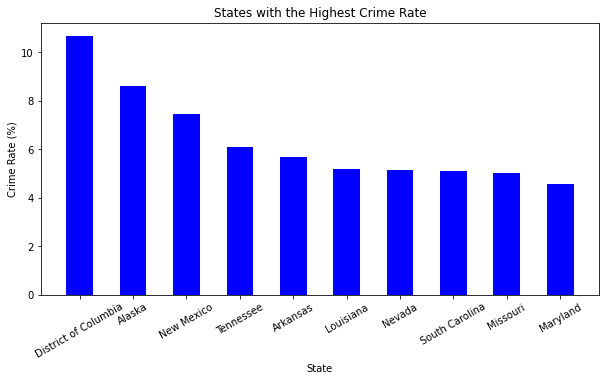

In [13]:
# Crime Vs. Unemployment (Brandon's work)

chartdata = censusCrimeData.filter(['State Name','Population','Unemployment Rate','Violent Crime Count','Crime Rate'])
chartdata.sort_values(by=['Crime Rate'], inplace=True,ascending=False)
chartdata.head(10)


data_dict = {'District of Columbia':10.687428, 'Alaska':8.605719, 'New Mexico':7.471132,'Tennessee':6.093431, 
             'Arkansas':5.699864, 'Louisiana':5.186561,'Nevada':5.136957, 'South Carolina':5.108542, 'Missouri':5.008755,
             'Maryland':4.571307}
state = list(data_dict.keys())
unemployment = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(state, unemployment, color ='blue',
        width = 0.5)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("State")
plt.ylabel("Crime Rate (%)")
plt.title("States with the Highest Crime Rate")
# plt.savefig('Output/bj_crimerate_bar.png')
plt.show()

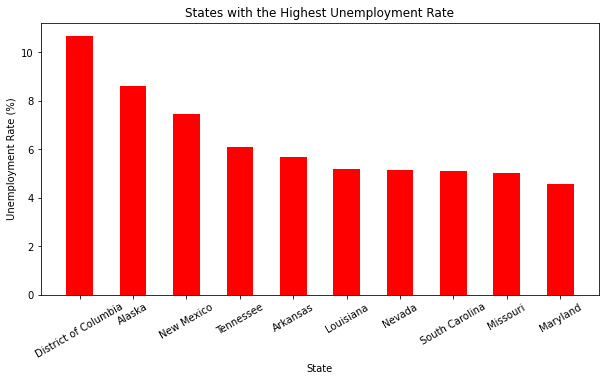

In [14]:
# States with the Highest Unemployment Rate

fig = plt.figure(figsize = (10, 5))

plt.bar(state, unemployment, color ='red',
        width = 0.5)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("State")
plt.ylabel("Unemployment Rate (%)")
plt.title("States with the Highest Unemployment Rate")
# plt.savefig('Output/bj_unemployment_bar.png')
plt.show()

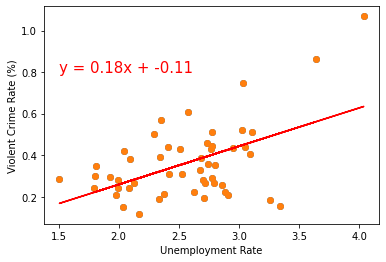

In [15]:
# Unemployment Rate

plt.scatter(censusCrimeData['Unemployment Rate'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Unemployment Rate']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.5,.8),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('Violent Crime Rate (%)')
# plt.savefig('Output/bj_unemploymentscatter.png')
plt.show()

In [16]:
correlation = st.pearsonr(x_values, y_values)
correlation

(0.5129600852334537, 0.00011866951928116001)

In [17]:
# Crime vs. Education (Tracie's Work)

# extract crime rate per state
crime_rate_df = censusCrimeData[["State Name","Crime Rate"]]
crime_rate_df.head()

,State Name,Crime Rate
0,Alabama,0.194904
1,Alaska,0.860572
2,Arizona,0.442506
3,Arkansas,0.569986
4,California,0.441147


In [25]:
# open edu_rate_df by reading csv file : edu_rate_df.to_csv("Output/edu_rate_df.csv", index=False, header=True)
# set the path 
Edu_rate_path = "Output/edu_rate_df.csv"

# Read the csv file 
edu_rate_df = pd.read_csv(Edu_rate_path)
edu_rate_df = edu_rate_df.rename(columns = {"% graduate":"graduate ratio (%)", "state":"State Name"})
edu_rate_df.dropna(how = "any", inplace = True)

# groupby edu file by state in order to have common and equal state column to merge later
edu_rate = edu_rate_df.groupby("State Name")[["number of graduates","Population","graduate ratio (%)"]].mean()
# edu_rate = edu_rate_df.mean()
edu_rate.head()


,number of graduates,Population,graduate ratio (%)
State Name,,,
Alabama,3801.089552,4799277.0,0.079201
Alaska,4331.428571,720316.0,0.601323
Arizona,8881.229508,6479703.0,0.137062
Arkansas,3167.291667,2933369.0,0.107975
California,6778.982405,37659181.0,0.018001


In [23]:
# Merge Census data with education
# merge two df together to get master_plot_df
master_plot_df = pd.merge(crime_rate_df, edu_rate, on = "State Name", how = "outer")
master_plot_df["graduate ratio (%)"]=master_plot_df["graduate ratio (%)"]*100
master_plot_df.head()


,State Name,Crime Rate,number of graduates,Population,graduate ratio (%)
0,Alabama,0.194904,3801.089552,4799277.0,7.920130
1,Alaska,0.860572,4331.428571,720316.0,60.132339
2,Arizona,0.442506,8881.229508,6479703.0,13.706229
3,Arkansas,0.569986,3167.291667,2933369.0,10.797454
4,California,0.441147,6778.982405,37659181.0,1.800088


In [64]:
# Sort by Population
popData = master_plot_df.filter(['State Name','Crime Rate','number of graduates','Population','graduate ratio (%)'])
top10 = popData.nlargest(10, columns=['Population'])
top10

,State Name,Crime Rate,number of graduates,Population,graduate ratio (%)
4,California,0.441147,6778.982405,37659181.0,1.800088
43,Texas,0.429325,6584.044335,25639373.0,2.567943
32,New York,0.354475,4235.406639,19487053.0,2.173446
9,Florida,0.387984,5542.828571,19091156.0,2.903349
13,Illinois,0.403316,4761.907143,12848554.0,3.706181
38,Pennsylvania,0.264018,2844.658986,12731381.0,2.234368
35,Ohio,0.280788,3324.261111,11549590.0,2.878250
22,Michigan,0.435814,6005.902174,9886095.0,6.075101
10,Georgia,0.263912,3819.817308,9810417.0,3.893634
33,North Carolina,0.356585,3812.853846,9651380.0,3.950579


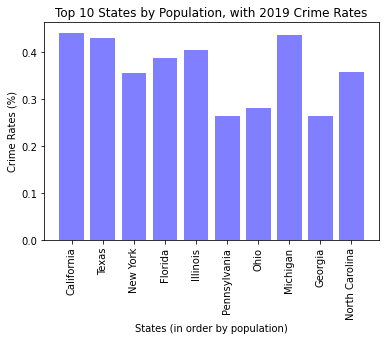

<Figure size 720x14400 with 0 Axes>

In [66]:
# use the masterdf df to implement bar chart to show the crime rates of all states in the US

#define the x and y axis by create a state_list and actuals_list from those columns
x_states = top10["State Name"]
y_crime = top10["Crime Rate"]

plt.bar(x_states, y_crime, color='blue', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Top 10 States by Population, with 2019 Crime Rates")
plt.xlabel("States (in order by population)")
plt.ylabel("Crime Rates (%)")
plt.figure(figsize=(10,200))
plt.savefig("Output/NEW_Crime_per_state.png")
plt.show()

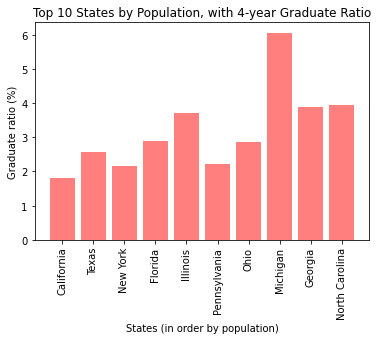

<Figure size 720x14400 with 0 Axes>

In [67]:
# same df to show the 4-year-academic-graduate ratio from Top 5 states
x_states = top10["State Name"]
y_graduate = top10["graduate ratio (%)"]
plt.bar(x_states, y_graduate, color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Top 10 States by Population, with 4-year Graduate Ratio")
plt.xlabel("States (in order by population)")
plt.ylabel("Graduate ratio (%)")
plt.figure(figsize=(10,200))
plt.savefig("Output/NEW_Education_states.png")
plt.show()